In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


tripdata_df = pd.read_csv('https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv')

/Users/ruimingli/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.5,0.5,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.0,0.5,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0


In [37]:
#check the frequency of null values in each column
tripdata_df.isnull().sum()

VendorID                  90725
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        90725
RatecodeID                90725
PULocationID                  0
DOLocationID                  0
passenger_count           90725
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                450627
improvement_surcharge         2
total_amount                  0
payment_type              90725
trip_type                 90727
congestion_surcharge      90727
dtype: int64

In [38]:
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False) 
# count the frequency of missing values in each row (i.e. how many columns are empty)

450626    8
390114    8
390138    8
390139    8
390140    8
         ..
150205    1
150204    1
150203    1
150202    1
225313    1
Length: 450627, dtype: int64

In [39]:
# trip fare should not be negative 
# total amount should not be negative 
# distance traveled should not be negative 

invalidNegData = tripdata_df[(tripdata_df.fare_amount < 0) | (tripdata_df.total_amount < 0) | (tripdata_df.trip_distance < 0)]

print (invalidNegData)

        VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
58           2.0  2019-12-01 00:35:40   2019-12-01 00:37:54   
410          2.0  2019-12-01 00:36:26   2019-12-01 00:42:22   
842          2.0  2019-12-01 02:00:06   2019-12-01 02:05:41   
1114         2.0  2019-12-01 03:38:45   2019-12-01 03:40:16   
1168         2.0  2019-12-01 03:54:54   2019-12-01 03:55:28   
...          ...                  ...                   ...   
450142       NaN  2019-12-31 18:51:00   2019-12-31 19:13:00   
450183       NaN  2019-12-31 18:39:00   2019-12-31 19:19:00   
450348       NaN  2019-12-31 20:16:00   2019-12-31 20:27:00   
450351       NaN  2019-12-31 20:42:00   2019-12-31 21:11:00   
450625       NaN  2019-12-31 23:16:00   2019-12-31 23:37:00   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
58                      N         1.0            80            80   
410                     N         1.0           112           112   
842                     N         1.

In [40]:
# deleting the data for rows with more than 40% 
#Handle missing data -- deletion
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 4] #delete rows with 4 or more missing variables (in each row)
tripdata_df['improvement_surcharge'].value_counts(dropna=False) 
tripdata_df.loc[tripdata_df['improvement_surcharge'].isna(), 'improvement_surcharge'] = '0.3' 

tripdata_df.shape

# drop column ehail_fee
tripdata_df = tripdata_df.drop(columns = 'ehail_fee')

# replacing the data with 1 variable missing 

# dropping the negative data for fare_amount 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.fare_amount < 0].index)

# dropping the negative data for total_amount 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.total_amount < 0].index)

# dropping the negative data for trip_distance 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.trip_distance < 0].index)

# changing data types 
tripdata_df['store_and_fwd_flag']  = tripdata_df['store_and_fwd_flag'].astype('string')
#tripdata_df['lpep_pickup_datetime']  = tripdata_df['lpep_pickup_datetime'].astype(int)
#tripdata_df['lpep_dropoff_datetime']  = tripdata_df['lpep_dropoff_datetime'].astype(int)

#print(tripdata_df)
tripdata_df.dtypes


VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        string
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge     object
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [41]:
# (5 pts) Partition the data into train/test split.
# (5 pts) Select the required features to build your model based on the insights from your EDA. 
# Briefly explain the reason for the features that you selected. Ensure that you encode any categorical features.


#divide the data into the input 'X' and the labels 'y'
X        = tripdata_df[['trip_distance', 'fare_amount', 'total_amount' ]] #the observations
y        = tripdata_df['tip_amount'] #the label


#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                                    X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 25% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    #stratify=y      #preserve the distribution of the labels
                                        ) 

# I selected trip distance, fare amount and total amount because I felt like these three features would be most 
# relevant to / related to the tip amount. Additionally, it is also because I would tip if I went on a long trip 
# and the driver was nice. 

In [43]:
# (15 pts) Build a model that predicts the tip amount.

for x in [1, 10, 100, 200]:
    rf = RandomForestRegressor(random_state=7, n_estimators = x)
    rf.fit(X_train, y_train)

    #predict the labels for the test set
    y_pred   = rf.predict(X_test)

    print(f"", x)
    print(f'The predicted tip amount is: ', np.mean(y_pred))
    
    mse = mean_squared_error(y_test, y_pred)
    
    # Evaluate the Predictions
    print(f'The mse of the model is: ', mse)


 1
The predicted tip amount is:  1.194976613483908
The mse of the model is:  1.4578023687218264
 10
The predicted tip amount is:  1.1914679442616276
The mse of the model is:  0.7326041159751183
 100
The predicted tip amount is:  1.192545551241524
The mse of the model is:  0.8819554549424242
 200
The predicted tip amount is:  1.192004775925997
The mse of the model is:  0.8611681542035088


In [ ]:
# Using 1, 10, 100, 200 trees, the mse of the model decreases as the trees goes up which means that the model 
# does a good job of predicting the the tip_amount. 
# The average predictied tip amount stayde rougly the same at 1.9 for all trees. 

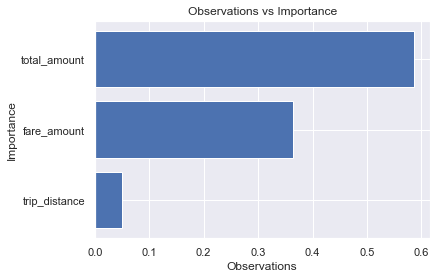

In [45]:

plt.barh(["trip_distance", "fare_amount", "total_amount"], rf.feature_importances_)
plt.xlabel("Observations")
plt.ylabel("Importance")
plt.title("Observations vs Importance")
plt.show()

In [ ]:
# the most important relevant feature seems to be the total amount of the trip and the fare amount of the trip. 